In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
oil=pd.read_excel("Brent.xls")
oil2=oil.copy()
oil2

,Date,SpotPrice
0,2016-10-03,48.61
1,2016-10-04,48.81
2,2016-10-05,49.57
3,2016-10-06,50.14
4,2016-10-07,50.49
...,...,...
1304,2021-11-16,82.85
1305,2021-11-17,80.67
1306,2021-11-18,82.45
1307,2021-11-19,80.24


In [4]:
oil['Year']=oil['Date'].dt.strftime('%y')
oil['Month']=oil['Date'].dt.strftime('%m')
oil['date']=oil['Date'].dt.strftime('%d')
oil['wkday']=oil['Date'].dt.strftime('%A')

In [5]:
oil

,Date,SpotPrice,Year,Month,date,wkday
0,2016-10-03,48.61,16,10,03,Monday
1,2016-10-04,48.81,16,10,04,Tuesday
2,2016-10-05,49.57,16,10,05,Wednesday
3,2016-10-06,50.14,16,10,06,Thursday
4,2016-10-07,50.49,16,10,07,Friday
...,...,...,...,...,...,...
1304,2021-11-16,82.85,21,11,16,Tuesday
1305,2021-11-17,80.67,21,11,17,Wednesday
1306,2021-11-18,82.45,21,11,18,Thursday
1307,2021-11-19,80.24,21,11,19,Friday


In [6]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder=OneHotEncoder()

In [7]:
df=pd.DataFrame(OneHotEncoder.fit_transform(oil[['Month']]).toarray())
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
df=df.rename(columns={0:'Jan',1:'Feb',2:'Mar',3:'Apr',4:'May',5:'Jun',6:'July',7:'Aug',8:'sep',9:'Oct',10:'Nov',11:'Dec',})

In [9]:
df=df[['Jan','Feb','Mar','Apr','May','Jun','July','Aug','sep','Oct','Nov','Dec']].astype(int)

In [10]:
oil['Jan']=df['Jan']

In [11]:
oil[['Feb','Mar','Apr','May','Jun','July','Aug','sep','Oct','Nov','Dec']]=df[['Feb','Mar','Apr','May','Jun','July','Aug','sep','Oct','Nov','Dec']]

In [12]:
oil['t']=np.arange(1,1310)
oil

,Date,SpotPrice,Year,Month,date,wkday,Jan,Feb,Mar,Apr,May,Jun,July,Aug,sep,Oct,Nov,Dec,t
0,2016-10-03,48.61,16,10,03,Monday,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2016-10-04,48.81,16,10,04,Tuesday,0,0,0,0,0,0,0,0,0,1,0,0,2
2,2016-10-05,49.57,16,10,05,Wednesday,0,0,0,0,0,0,0,0,0,1,0,0,3
3,2016-10-06,50.14,16,10,06,Thursday,0,0,0,0,0,0,0,0,0,1,0,0,4
4,2016-10-07,50.49,16,10,07,Friday,0,0,0,0,0,0,0,0,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2021-11-16,82.85,21,11,16,Tuesday,0,0,0,0,0,0,0,0,0,0,1,0,1305
1305,2021-11-17,80.67,21,11,17,Wednesday,0,0,0,0,0,0,0,0,0,0,1,0,1306
1306,2021-11-18,82.45,21,11,18,Thursday,0,0,0,0,0,0,0,0,0,0,1,0,1307
1307,2021-11-19,80.24,21,11,19,Friday,0,0,0,0,0,0,0,0,0,0,1,0,1308


In [13]:
oil['Date'] = pd.to_datetime(oil.Date)


In [14]:
day_of_week_columns = pd.get_dummies(oil['wkday'])
oil.merge(day_of_week_columns, left_index=True, right_index=True)

,Date,SpotPrice,Year,Month,date,wkday,Jan,Feb,Mar,Apr,...,sep,Oct,Nov,Dec,t,Friday,Monday,Thursday,Tuesday,Wednesday
0,2016-10-03,48.61,16,10,03,Monday,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,2016-10-04,48.81,16,10,04,Tuesday,0,0,0,0,...,0,1,0,0,2,0,0,0,1,0
2,2016-10-05,49.57,16,10,05,Wednesday,0,0,0,0,...,0,1,0,0,3,0,0,0,0,1
3,2016-10-06,50.14,16,10,06,Thursday,0,0,0,0,...,0,1,0,0,4,0,0,1,0,0
4,2016-10-07,50.49,16,10,07,Friday,0,0,0,0,...,0,1,0,0,5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2021-11-16,82.85,21,11,16,Tuesday,0,0,0,0,...,0,0,1,0,1305,0,0,0,1,0
1305,2021-11-17,80.67,21,11,17,Wednesday,0,0,0,0,...,0,0,1,0,1306,0,0,0,0,1
1306,2021-11-18,82.45,21,11,18,Thursday,0,0,0,0,...,0,0,1,0,1307,0,0,1,0,0
1307,2021-11-19,80.24,21,11,19,Friday,0,0,0,0,...,0,0,1,0,1308,1,0,0,0,0


In [15]:
oil['t_square']=np.square(oil['t'])

In [16]:
oil['Log_spotprice']=np.log(oil['SpotPrice'])

## Heatmap

<AxesSubplot:xlabel='Month', ylabel='Year'>

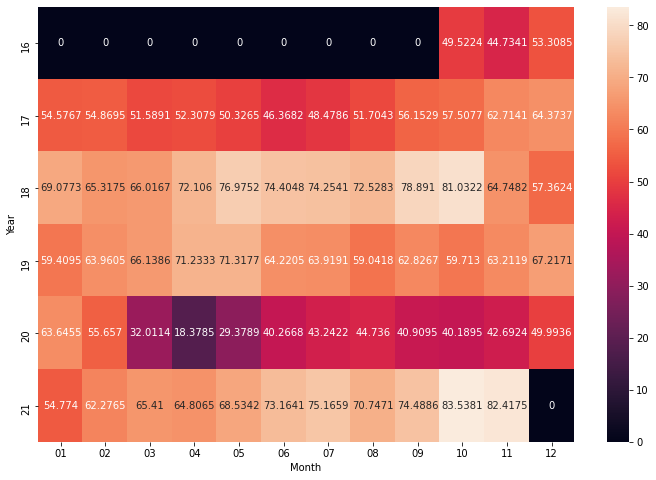

In [17]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=oil,values="SpotPrice",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

In [18]:
oil2.rename(columns={'SpotPrice':'Price'},inplace=True)

In [19]:
##Setting Date as Index
oil2.set_index('Date',inplace=True)


In [20]:
oil2.head()

,Price
Date,
2016-10-03,48.61
2016-10-04,48.81
2016-10-05,49.57
2016-10-06,50.14
2016-10-07,50.49


In [21]:
oil2.shape

(1309, 1)

### Line Plot

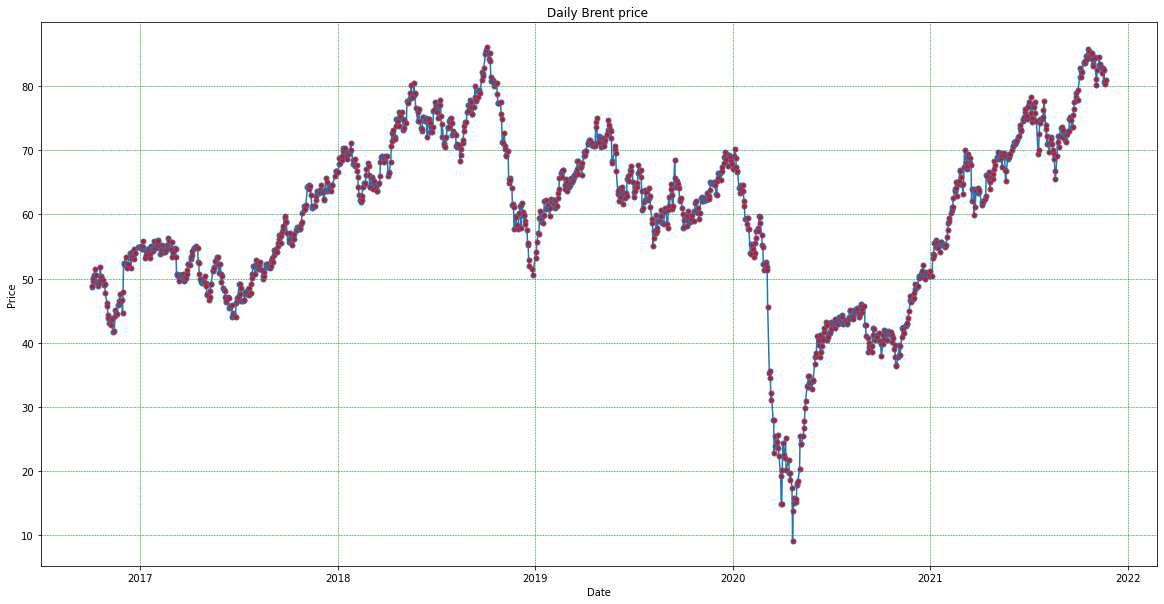

In [22]:
plt.figure(figsize=(20,10))
plt.title("Daily Brent price ")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(oil2, marker = 'o', ms = 5, mfc = 'r')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

## Histogram and Density Plot

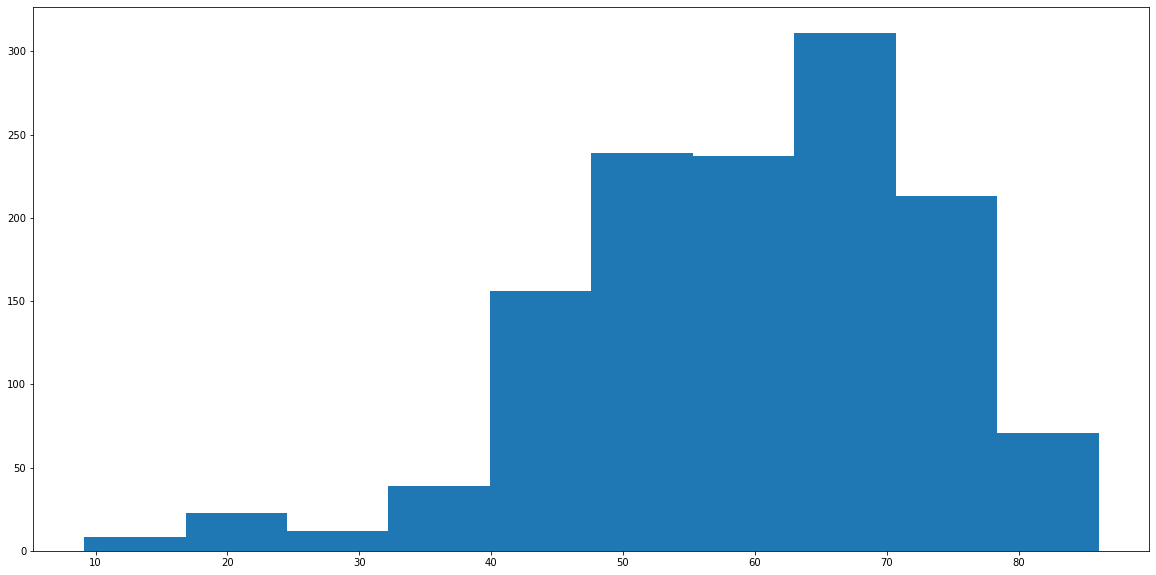

In [23]:
plt.figure(figsize=(20,10))
plt.subplot()
plt.hist(oil2)
plt.show()

<Figure size 1440x720 with 0 Axes>

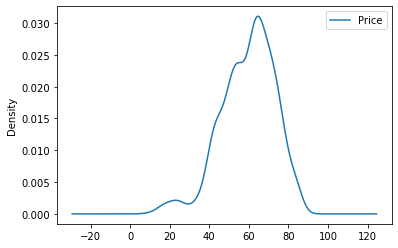

In [24]:
plt.figure(figsize=(20,10))
oil2.plot(kind='kde')
plt.show()

## Box Plot

In [25]:
## Temporary DataFrame
temp_data = oil2
temp_data['Year'] = oil2.index.year

Text(0.5, 1.0, 'Box Plot Year Wise-WTI')

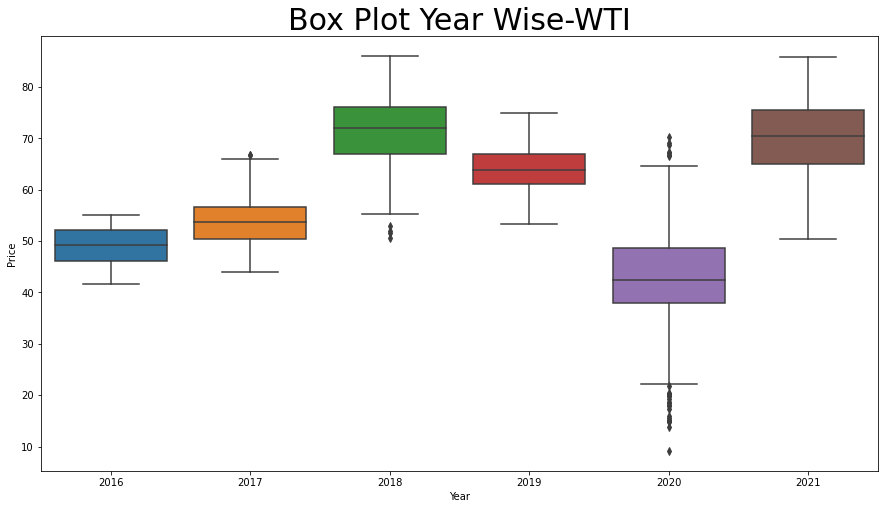

In [26]:
##Box Plot Year Wise Brent
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=temp_data['Year'], y=temp_data['Price'])
ax.set_title('Box Plot Year Wise-WTI',fontsize=30)

## Lag Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

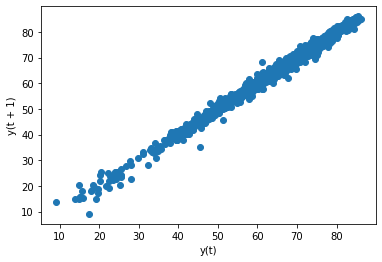

In [27]:
from pandas.plotting import lag_plot

lag_plot(oil2['Price'])

In [28]:
## lag scatter plot gives a Positive correction relationship . Hence they can be modelled.

## AutoCorrelation Function (ACF)

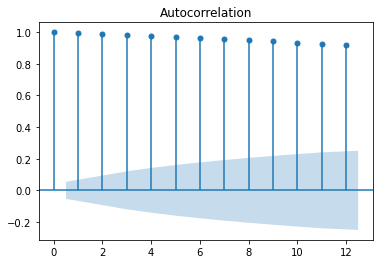

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(oil2['Price'], lags=12)
plt.show()

## Partial AutoCorrelation Function (PCAF)

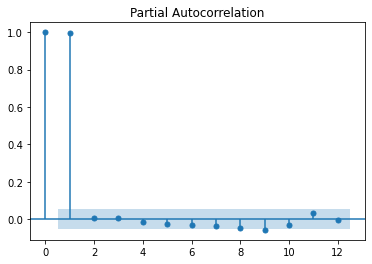

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(oil2['Price'],lags=12)
plt.show()

## In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.